In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Double check TF 2.0x is installed. If you ran the above block, there was a 
# 'reset all runtimes' button at the bottom that you needed to press
import matplotlib.pyplot as plt
import io
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Flatten, GlobalAveragePooling1D, Embedding
from tensorflow.compat.v1 import reset_default_graph
from tensorflow.compat.v1.data import get_output_shapes
print(tf.__version__)

2.3.0


In [2]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)
train_data: tf.raw_ops.PrefetchDataset = imdb["train"]
test_data: tf.raw_ops.PrefetchDataset = imdb["test"]

In [3]:
tokenizer: tfds.deprecated.text.SubwordTextEncoder = info.features['text'].encoder

In [4]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [5]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string: [int] = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string: str = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [6]:
for ts in tokenized_string:
    print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [7]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset: tf.raw_ops.ShuffleDataset = train_data.shuffle(BUFFER_SIZE)
train_dataset: tf.raw_ops.PaddedBatchDataset = train_dataset.padded_batch(BATCH_SIZE, get_output_shapes(train_dataset))
test_dataset: tf.raw_ops.PaddedBatchDataset = test_data.padded_batch(BATCH_SIZE, get_output_shapes(test_data))

In [8]:
embedding_dim = 64
model = Sequential([
    Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim, name="embedding_1", input_length=None),    # input_length=None表示长度可变
    GlobalAveragePooling1D(name="poolavg1d_2"),
    Dense(units=6, activation='relu', name="dense_2"),
    Dense(units=1, activation='sigmoid', name="dense_3")
], name="IMDBsubwords_classifier")
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "IMDBsubwords_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
poolavg1d_2 (GlobalAveragePo (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [9]:
num_epochs = 10
history = model.fit(
    train_dataset, 
    validation_data=test_dataset,
    epochs=num_epochs, 
    workers=-1,
    use_multiprocessing=True
)

Epoch 1/10
391/391 [==============================] - 11s 28ms/step - loss: 0.6822 - accuracy: 0.5966 - val_loss: 0.6538 - val_accuracy: 0.7568
Epoch 2/10
391/391 [==============================] - 11s 27ms/step - loss: 0.5743 - accuracy: 0.7719 - val_loss: 0.5050 - val_accuracy: 0.8197
Epoch 3/10
391/391 [==============================] - 11s 28ms/step - loss: 0.4266 - accuracy: 0.8524 - val_loss: 0.4022 - val_accuracy: 0.8561
Epoch 4/10
391/391 [==============================] - 11s 28ms/step - loss: 0.3407 - accuracy: 0.8820 - val_loss: 0.3552 - val_accuracy: 0.8637
Epoch 5/10
391/391 [==============================] - 11s 28ms/step - loss: 0.2915 - accuracy: 0.8968 - val_loss: 0.3333 - val_accuracy: 0.8664
Epoch 6/10
391/391 [==============================] - 11s 28ms/step - loss: 0.2615 - accuracy: 0.9060 - val_loss: 0.3193 - val_accuracy: 0.8758
Epoch 7/10
391/391 [==============================] - 11s 28ms/step - loss: 0.2390 - accuracy: 0.9158 - val_loss: 0.3106 - val_accuracy:

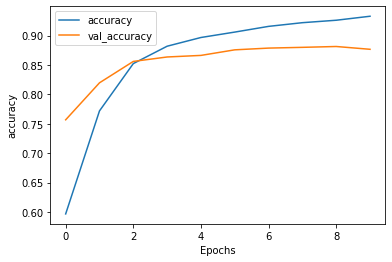

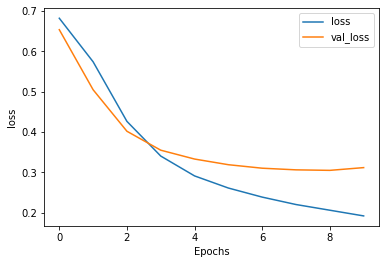

In [10]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [11]:
e: Embedding = model.layers[0]
weights: np.ndarray = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

out_v = io.open('../data/ImdbReviews/vecs_subwords.tsv', 'w', encoding='utf-8')
out_m = io.open('../data/ImdbReviews/meta_subwords.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
    word = tokenizer.decode([word_num])
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

(8185, 64)


<b>把"'../data/ImdbReviews/vecs_subwords.tsv"文件和"../data/ImdbReviews/meta_subwords.tsv"文件放到<a href="https://projector.tensorflow.org/" target="_blank">这个网址</a>进行可视化展示</b>

In [12]:
try:
    from google.colab import files
except ImportError as e:
    print(e)
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

No module named 'termios'
